In [1]:
import torch
import numpy as np
import concurrent.futures
import multiprocessing as mp

from comparison import comparison

In [2]:
test_name = "test0"

In [3]:
iterations = 20


if __name__ == '__main__':
  
    SEEDS = np.linspace(1, iterations, iterations, dtype=int).tolist()

    error_list_fedavg = []
    score_list_fedavg = []
    error_list_fedadapt = []
    score_list_fedadapt = []

    with concurrent.futures.ProcessPoolExecutor(max_workers=mp.cpu_count(), mp_context=mp.get_context("spawn")) as executor:
            for e_adapt, s_adapt, e_avg, s_avg in executor.map(comparison, SEEDS):
                error_list_fedavg.append(e_avg)
                score_list_fedavg.append(s_avg)
                error_list_fedadapt.append(e_adapt)
                score_list_fedadapt.append(s_adapt)

In [4]:
# Create Error List, And calculate standard deviation for both the algorithms. and both the metrics


err = []
err_std = []
for i in range(0, len(error_list_fedavg[0])):
    s = 0
    e = []
    for k in error_list_fedavg:
        s += k[i]
        e.append(k[i])
    err.append(s / len(error_list_fedavg))
    err_std.append(np.std(e))

    
sc = []
sc_std = []
for i in range(0, len(score_list_fedavg[0])):
    s = 0
    e = []
    for k in score_list_fedavg:
        s += k[i]
        e.append(k[i])
    sc.append(s / len(score_list_fedavg))
    sc_std.append(np.std(e))

    
    
    
    
    
    
    
err_s = []
err_s_std = []
for i in range(0, len(error_list_fedadapt[0])):
    s = 0
    e = []
    for k in error_list_fedadapt:
        s += k[i]
        e.append(k[i])
    err_s.append(s / len(error_list_fedadapt))
    err_s_std.append(np.std(e))

    
    
sc_s = []
sc_s_std = []
for i in range(0, len(score_list_fedadapt[0])):
    s = 0
    e = []
    for k in score_list_fedadapt:
        s += k[i]
        e.append(k[i])
    sc_s.append(s / len(score_list_fedadapt))
    sc_s_std.append(np.std(e))

'   \nerr_s_d = []\nerr_s_d_std = []\nfor i in range(0, len(error_list_fedreg_dist[0])):\n    s = 0\n    e = []\n    for k in error_list_fedreg_dist:\n        s += k[i]\n        e.append(k[i])\n    err_s_d.append(s / len(error_list_fedreg_dist))\n    err_s_d_std.append(np.std(e))\n\nsc_s_d = []\nsc_s_d_std = []\nfor i in range(0, len(score_list_fedreg_dist[0])):\n    s = 0\n    e = []\n    for k in score_list_fedreg_dist:\n        s += k[i]\n        e.append(k[i])\n    sc_s_d.append(s / len(score_list_fedreg_dist))\n    sc_s_d_std.append(np.std(e))\n\n'

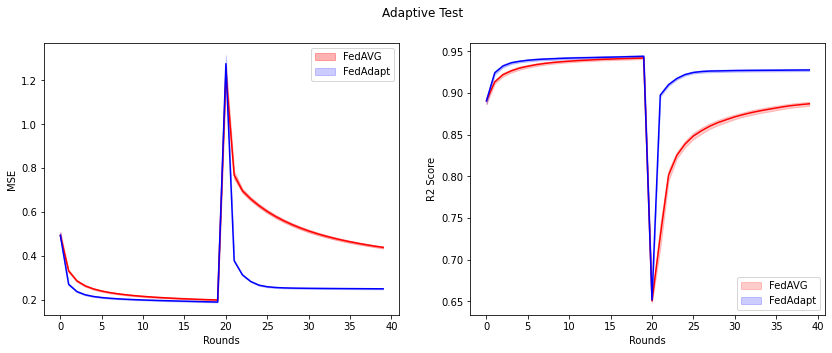

In [11]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.ticker import MaxNLocator


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
fig.suptitle("Adaptive Test")


x = np.arange(len(error_list_fedavg[0]))


### Loss

ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))


ax1.fill_between(x, np.array(err)+np.array(err_std), np.array(err)-np.array(err_std), color='red', label='FedAVG', alpha=0.3)
ax1.fill_between(x, np.array(err_s)+np.array(err_s_std), np.array(err_s)-np.array(err_s_std), color='blue', label='FedAdapt', alpha=0.2)

ax1.plot(x, err, color='red')
ax1.plot(x, err_s, color='blue')

ax1.legend(loc='upper right')

ax1.set_xlabel("Rounds")
ax1.set_ylabel("MSE")


### Accuracy

ax2.fill_between(x, np.array(sc)+np.array(sc_std), np.array(sc)-np.array(sc_std), color='red', label='FedAVG', alpha=0.2)
ax2.fill_between(x, np.array(sc_s)+np.array(sc_s_std), np.array(sc_s)-np.array(sc_s_std), color='blue', label='FedAdapt', alpha=0.2)

ax2.plot(x, sc, color='red')
ax2.plot(x, sc_s, color='blue')

ax2.legend(loc='lower right')

ax2.set_xlabel("Rounds")
ax2.set_ylabel("R2 Score")




plt.draw()

plt.savefig("Adaptive_Tests/plots/"+test_name+".svg")

In [6]:
## Save the data for future analysis

import pandas as pd


d = {'Error_FedAVG': err, 
     'Error_FedAVG_std': err_std,
     'Score_FedAVG': sc, 
     'Score_FedAVG_std': sc_std,
     'Error_Adaptive': err_s, 
     'Error_Adaptive_std': err_s_std,
     'Score_Adaptive': sc_s, 
     'Score_Adaptive_std': sc_s_std}

df = pd.DataFrame(data=d)

df.to_csv("Adaptive_Tests/data/"+test_name+".csv", index=False)